## KNN Algorithms

## Imports the library 

choosing K value properly will gave  accuracy.choosing right value of K called 'Parameter Tuning'.
K representthe number of nearest neighbour choosen  by the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Datasets

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data= pd.DataFrame(data)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##  Preprocess the Data 

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
col_list = ['Glucose', 'BloodPressure' , 'SkinThickness' ,'Insulin', 'BMI']

In [8]:
for i in col_list:
    data[i]= data[i].replace(0 , np.nan)
    mean =int(data[i].mean(skipna =True))
    data[i] = data[i].replace(np.nan , mean)

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


## Datasplits into X and y

In [10]:
X = data.iloc[: , :-1]

In [11]:
y = data.iloc[:, -1]

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , shuffle = False)

 ## Accuacy with Different k values 

In [14]:
k_range = range(1 ,20)
score = []
for k in k_range:
    model =KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train , y_train)
    accuracy = model.score(X_test , y_test)
    score.append(accuracy)
    print('k = %d Accuracy = %.2f%%' % (k, accuracy*100))

k = 1 Accuracy = 65.58%
k = 2 Accuracy = 69.48%
k = 3 Accuracy = 70.13%
k = 4 Accuracy = 71.43%
k = 5 Accuracy = 70.78%
k = 6 Accuracy = 69.48%
k = 7 Accuracy = 74.68%
k = 8 Accuracy = 77.27%
k = 9 Accuracy = 76.62%
k = 10 Accuracy = 74.68%
k = 11 Accuracy = 76.62%
k = 12 Accuracy = 77.27%
k = 13 Accuracy = 75.32%
k = 14 Accuracy = 75.97%
k = 15 Accuracy = 74.03%
k = 16 Accuracy = 74.68%
k = 17 Accuracy = 74.03%
k = 18 Accuracy = 76.62%
k = 19 Accuracy = 76.62%


Text(0, 0.5, 'Accuracy')

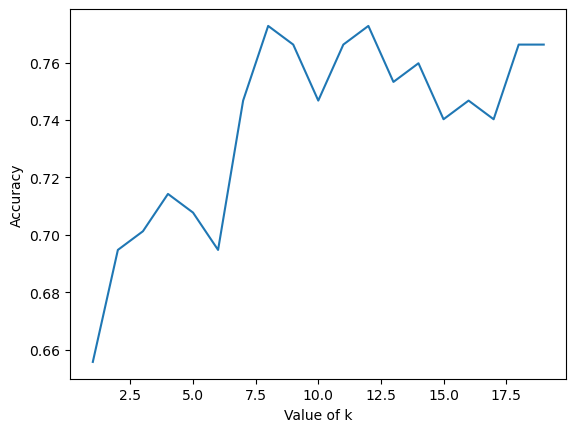

In [16]:
plt.plot(k_range , score)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')

In [21]:
model = KNeighborsClassifier(n_neighbors =8 , metric = 'euclidean')
model.fit(X_train , y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'euclidean'
,metric_params,None
,n_jobs,None


In [22]:
# find Accuracy
accuracy = model.score(X_test , y_test)
accuracy

0.7727272727272727

In [23]:
model.predict([[1, 189 , 60 ,23 , 846 , 30.1 , 0.398 , 59]])

E:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])